# Performance 
Execution times for the multi armed bandit algorithms

In [1]:
%load_ext autoreload
%autoreload 2
from bandits import linucb, thompson_sampling, ucb1, egreedy
from evaluator import evaluate
import dataset
from matplotlib import pyplot as plt

files = ("ydata-fp-td-clicks-v1_0.20090509",)
dataset.get_yahoo_events(files)

3618698 events with 44 articles


## Execution times on the learning bucket

learn     egreedy (ε=0.1)     0.031     2.7s
learn     TS                  0.028     8.3s
learn     UCB1 (α=0.3)        0.023     5.1s
learn     LinUCB (α=0.3)      0.034     36.9s


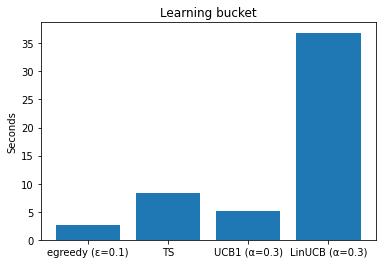

In [2]:
tests = [egreedy(0.1),thompson_sampling(),ucb1(0.3),linucb(0.3)]
alg_names = [x.algorithm for x in tests]
times = []
for test in tests:
    _, t = evaluate(test, mode="learn")
    times.append(t)
    
plt.bar(alg_names, times)
plt.ylabel("Seconds")
plt.title("Learning bucket")
plt.show()

## Execution times on the deployment bucket

deploy    egreedy (ε=0.1)     0.045     19.2s
deploy    TS                  0.047     1.2m
deploy    UCB1 (α=0.3)        0.042     41.4s
deploy    LinUCB (α=0.3)      0.054     6.0m


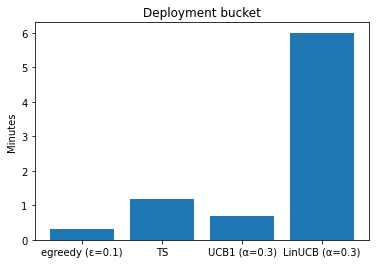

In [3]:
times = []
for test in tests:
    _, t = evaluate(test, mode="deploy")
    times.append(t/60)
    
plt.bar(alg_names, times)
plt.ylabel("Minutes")
plt.title("Deployment bucket")
plt.show()